In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

import pandas as pd
df = pd.read_csv("/content/coin_gecko_2022-03-17.csv")#data is collected

Cryptocurrency Liquidity Prediction for Market Stability
 Problem Statement


 Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
can lead to increased price fluctuations and market instability.
 In this project, you are required to build a machine learning model to predict cryptocurrency liquidity levels
based on various market factors such as trading volume, transaction patterns, exchange listings, and social
media activity. The objective is to detect liquidity crises early to help traders and exchange platforms
manage risks effectively.
 Your final model should provide insights into market stability by forecasting liquidity variations, allowing
traders and financial institutions to make informed decisions.

 Project Development Step



 Data Collection: Gather historical cryptocurrency price, volume, and liquidity-related data


 Data Preprocessing: Handle missing values, clean data, and normalize numerical features


 Exploratory Data Analysis (EDA): Analyze data patterns, trends, and correlations


 Feature Engineering: Create relevant liquidity-related features such as moving averages, volatility, and
liquidity ratios


 Model Selection: Choose appropriate machine learning models such as time-series forecasting, regression,
or deep learning approaches


 Model Training: Train the selected model using the processed dataset

 Model Evaluation: Assess model performance using metrics such as RMSE, MAE, and R² score
 Hyperparameter Tuning: Optimize model parameters for better accuracy

 Model Testing & Validation: Test the model on unseen data and analyze predictions

 Local Deployment: Deploy the trained model locally using Flask or Streamlit for testing

Expected Deliverables

 1. Machine Learning Model.
A trained model that predicts cryptocurrency liquidity
 Evaluation metrics showing how well the model performs.
 2. Data Processing & Feature Engineering
 Cleaned and prepared dataset
 A brief explanation of new features added.
 3. Exploratory Data Analysis (EDA) Report
 Summary of dataset statistics
 Basic visualizations (trends, correlations, distributions).
 4. Project Documentatio
 High-Level Design (HLD) Document: Overview of system and architecture
 Low-Level Design (LLD) Document: Breakdown of how each component is implemented
 Pipeline Architecture: Explanation of data flow from preprocessing to prediction
 Final Report: A simple summary of findings, model performance, and key insights

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [ ]:
df.columns


Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        495 non-null    object 
 1   symbol      495 non-null    object 
 2   price       495 non-null    float64
 3   1h          495 non-null    float64
 4   24h         495 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  495 non-null    float64
 7   mkt_cap     495 non-null    float64
 8   date        495 non-null    object 
dtypes: float64(6), object(3)
memory usage: 38.7+ KB


In [ ]:
df["coin"]

,coin
0,Bitcoin
1,Ethereum
2,Tether
3,BNB
4,USD Coin
...,...
495,IRISnet
496,Circuits of Value
497,ARPA Chain
498,SuperRare


In [ ]:
df["symbol"]

,symbol
0,BTC
1,ETH
2,USDT
3,BNB
4,USDC
...,...
495,IRIS
496,COVAL
497,ARPA
498,RARE


In [ ]:
df["date"]

,date
0,2022-03-17
1,2022-03-17
2,2022-03-17
3,2022-03-17
4,2022-03-17
...,...
495,2022-03-17
496,2022-03-17
497,2022-03-17
498,2022-03-17


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df.info()#data cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        495 non-null    object        
 1   symbol      495 non-null    object        
 2   price       495 non-null    float64       
 3   1h          495 non-null    float64       
 4   24h         495 non-null    float64       
 5   7d          495 non-null    float64       
 6   24h_volume  495 non-null    float64       
 7   mkt_cap     495 non-null    float64       
 8   date        495 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 38.7+ KB


In [ ]:
#EDA

In [ ]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495
mean,5.833849e+02,0.000582,0.019168,0.008038,2.491049e+08,3.823557e+09,2022-03-17 00:00:00
min,1.484000e-09,-0.704000,-0.646000,-0.558000,4.349000e+01,6.731896e+07,2022-03-17 00:00:00
25%,2.040150e-01,-0.001000,0.000000,-0.051500,1.747366e+06,1.198010e+08,2022-03-17 00:00:00
50%,1.100000e+00,0.001000,0.011000,-0.014000,7.848894e+06,2.180627e+08,2022-03-17 00:00:00
75%,7.065000e+00,0.004000,0.030000,0.020000,3.537307e+07,6.103960e+08,2022-03-17 00:00:00
max,4.090907e+04,0.095000,0.577000,4.608000,4.413140e+10,7.760774e+11,2022-03-17 00:00:00
std,4.248706e+03,0.033087,0.058928,0.252549,2.287919e+09,3.846057e+10,NaN


In [ ]:
unique_coins = df['coin'].unique()
unique_coins

array(['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'USD Coin', 'XRP', 'Terra',
       'Solana', 'Cardano', 'Avalanche', 'Polkadot', 'Binance USD',
       'Dogecoin', 'TerraUSD', 'Shiba Inu', 'Wrapped Bitcoin', 'Cronos',
       'Polygon', 'Dai', 'Cosmos Hub', 'Litecoin', 'Lido Staked Ether',
       'Near', 'Chainlink', 'TRON', 'FTX Token', 'LEO Token',
       'Bitcoin Cash', 'OKB', 'Algorand', 'Stellar', 'Uniswap', 'Hedera',
       'Axie Infinity', 'Decentraland', 'The Sandbox',
       'Internet Computer', 'Ethereum Classic', 'Elrond', 'Monero',
       'cETH', 'VeChain', 'Filecoin', 'Fantom', 'Klaytn', 'Osmosis',
       'Waves', 'Frax', 'Theta Network', 'Magic Internet Money', 'Tezos',
       'The Graph', 'cUSDC', 'THORChain', 'Helium', 'EOS', 'Flow', 'Aave',
       'IOTA', 'ECOMI', 'cDAI', 'Theta Fuel', 'Maker', 'Zcash',
       'PancakeSwap', 'JUNO', 'Gala', 'BitTorrent', 'Arweave',
       'Huobi BTC', 'Harmony', 'Quant', 'eCash', 'Bitcoin SV', 'NEO',
       'Huobi Token', 'TrueUSD', 'Xido

In [ ]:
len(unique_coins)# all are unique coins


495

In [ ]:
df["symbol"].unique()

array(['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'LUNA', 'SOL', 'ADA',
       'AVAX', 'DOT', 'BUSD', 'DOGE', 'UST', 'SHIB', 'WBTC', 'CRO',
       'MATIC', 'DAI', 'ATOM', 'LTC', 'STETH', 'NEAR', 'LINK', 'TRX',
       'FTT', 'LEO', 'BCH', 'OKB', 'ALGO', 'XLM', 'UNI', 'HBAR', 'AXS',
       'MANA', 'SAND', 'ICP', 'ETC', 'EGLD', 'XMR', 'CETH', 'VET', 'FIL',
       'FTM', 'KLAY', 'OSMO', 'WAVES', 'FRAX', 'THETA', 'MIM', 'XTZ',
       'GRT', 'CUSDC', 'RUNE', 'HNT', 'EOS', 'FLOW', 'AAVE', 'MIOTA',
       'OMI', 'CDAI', 'TFUEL', 'MKR', 'ZEC', 'CAKE', 'JUNO', 'GALA',
       'BTT', 'AR', 'HBTC', 'ONE', 'QNT', 'XEC', 'BSV', 'NEO', 'HT',
       'TUSD', 'XIDO', 'CEL', 'KCS', 'ENJ', 'STX', 'HEART', 'CELO', 'BAT',
       'XRD', 'NEXO', 'KSM', 'AMP', 'CHZ', 'KDA', 'DASH', 'FXS', 'CVX',
       'BIT', 'USDP', 'SNX', 'GT', 'LRC', 'XEM', 'MINA', 'CRV', 'ROSE',
       'SCRT', 'LN', 'CUSDT', 'COMP', 'ANC', 'DCR', 'IOTX', 'HOT', 'KUB',
       'YFI', 'USDN', 'NXM', 'XDC', 'SLP', 'WAXP', 'QTUM', 'SUSHI',
    

In [ ]:
len(df["symbol"].unique())#only 3 symbols are repeated


492

In [ ]:
df["mkt_cap"]

,mkt_cap
0,7.760774e+11
1,3.390772e+11
2,8.020588e+10
3,6.556116e+10
4,5.259607e+10
...,...
495,6.809024e+07
496,6.782627e+07
497,6.776284e+07
498,6.738822e+07


In [ ]:
df.sort_values(by="mkt_cap",ascending=False).head(10)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17
5,XRP,XRP,0.796926,0.006,0.016,0.038,3.642947e+09,3.834236e+10,2022-03-17
6,Terra,LUNA,87.640000,-0.000,-0.020,-0.118,1.555364e+09,3.225657e+10,2022-03-17
7,Solana,SOL,90.620000,0.016,0.058,0.028,1.921989e+09,2.927060e+10,2022-03-17
8,Cardano,ADA,0.838396,0.002,0.018,-0.013,7.844362e+08,2.689173e+10,2022-03-17
9,Avalanche,AVAX,79.780000,0.002,0.083,0.027,1.386901e+09,2.128204e+10,2022-03-17


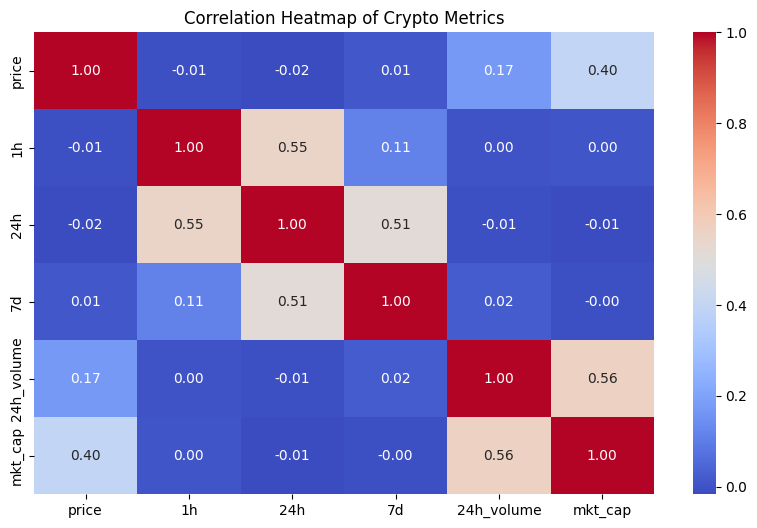

In [ ]:


plt.figure(figsize=(10, 6))
sns.heatmap(df[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Crypto Metrics')
plt.show()


/tmp/ipython-input-502314422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="coin", y="mkt_cap", palette="crest")


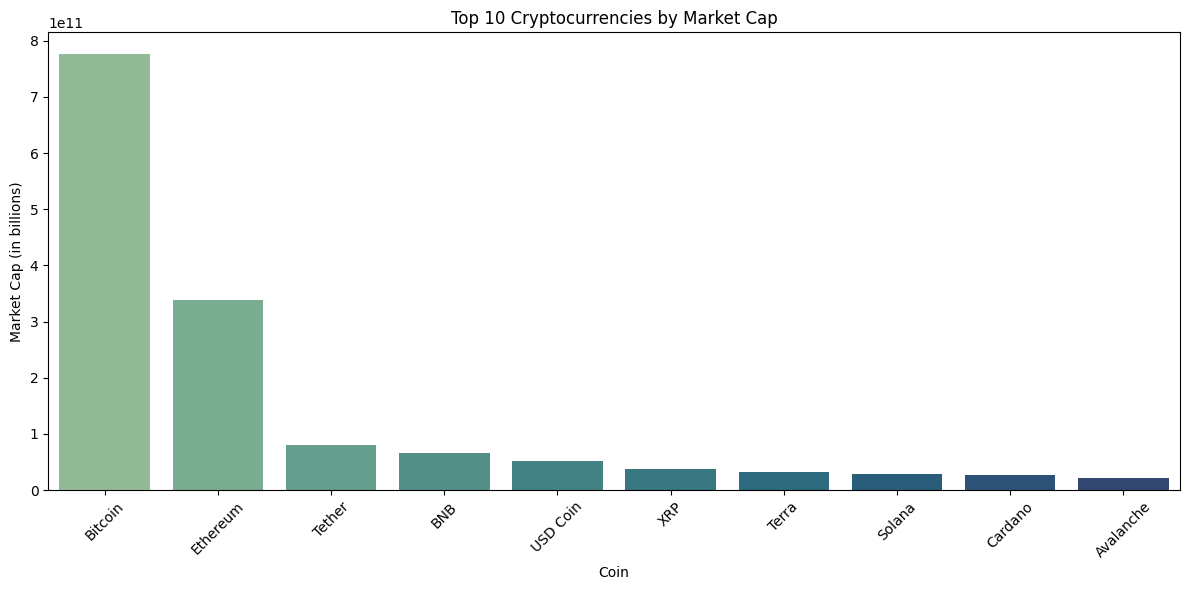

In [ ]:
top10 = df.sort_values(by="mkt_cap", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="coin", y="mkt_cap", palette="crest")
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.xlabel("Coin")
plt.ylabel("Market Cap (in billions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#biticon have high market_capacity,avalanche have less market capacity

In [ ]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [ ]:

num_features = [col for col in df.columns if df[col].dtype == 'float64']


df[num_features].skew().sort_values(ascending=False)


,0
mkt_cap,17.831662
24h_volume,16.174388
7d,12.955256
price,8.894565
24h,-0.225195
1h,-19.567455


In [ ]:
df_log_transformed = df[num_features].apply(lambda x: np.log1p(x) if (x >= 0).all() else x)

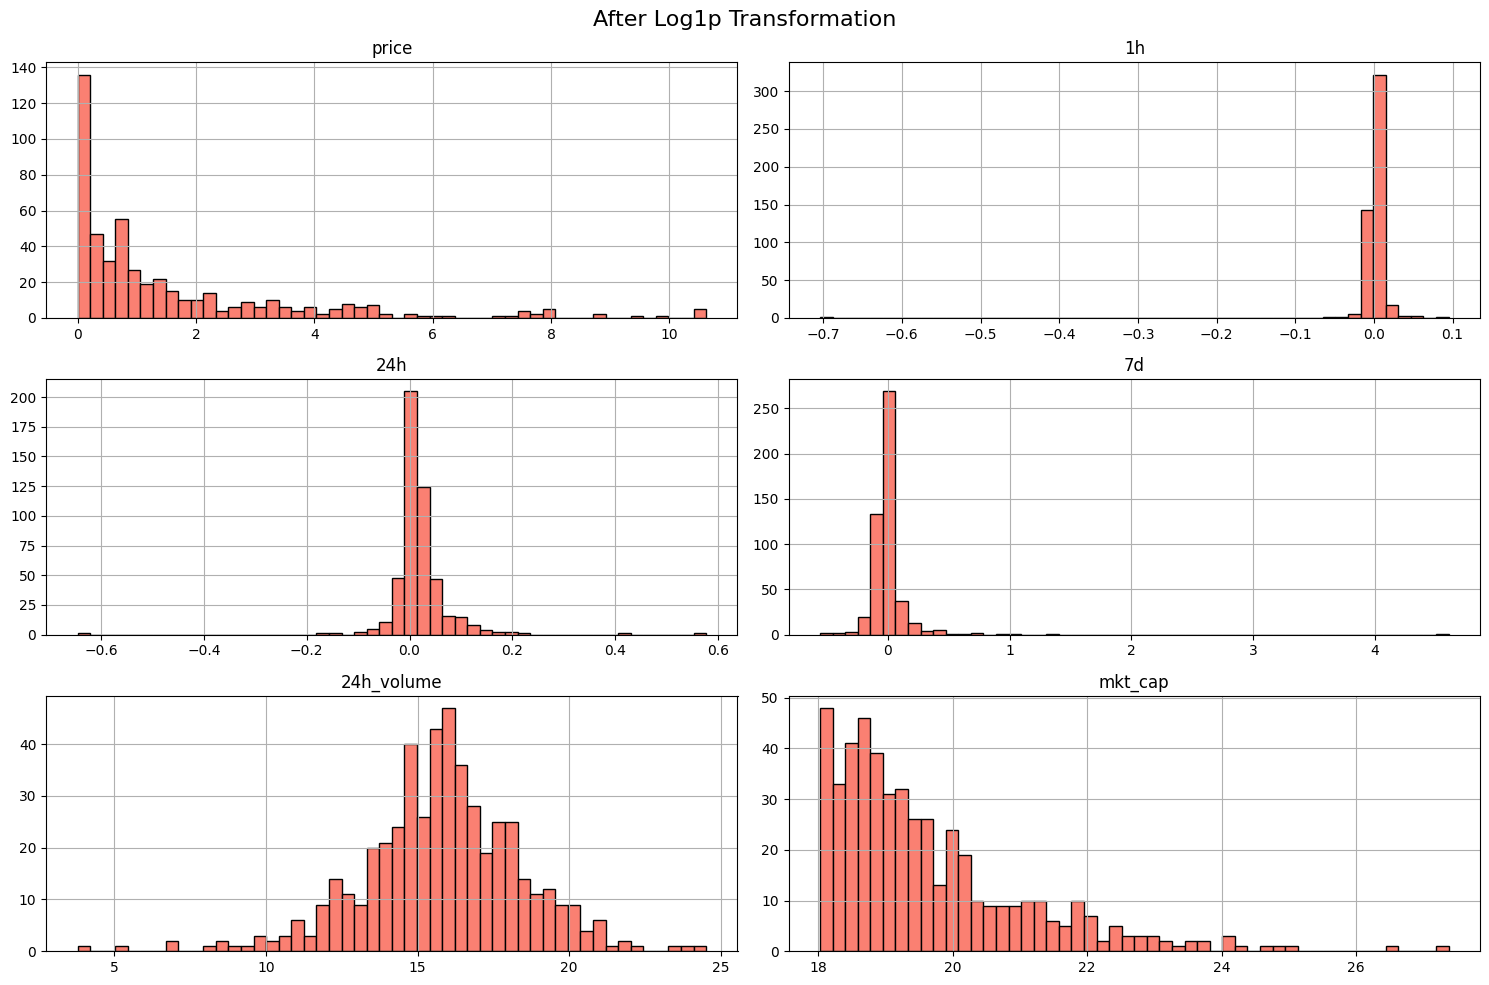

In [ ]:

df_log_transformed.hist(figsize=(15, 10), bins=50, color='salmon', edgecolor='black')
plt.suptitle("After Log1p Transformation", fontsize=16)
plt.tight_layout()


Many ML models assume normality (like linear regression, logistic regression, etc.)

Skewed features can distort model predictions — models give too much importance to rare extreme values (outliers).

Evaluation metrics become misleading.for this most common method log transformatiom

In [ ]:
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']
df['volatility_7d'] = df['7d'].abs()
df['volatility_24h'] = df['24h'].abs()


In [ ]:
# Simulate moving average by ranking top coins and smoothing
df_sorted = df.sort_values(by='mkt_cap', ascending=False).reset_index(drop=True)

# Rolling over sorted data (just a rough estimate)
df['ma_price'] = df_sorted['price'].rolling(window=10, min_periods=1).mean()
df['ma_volume'] = df_sorted['24h_volume'].rolling(window=10, min_periods=1).mean()



 Feature Selection (Optional but useful)

In [ ]:
# Optional: drop non-numeric, non-useful for prediction
df_model = df.drop(columns=['coin', 'symbol', 'date'])

# Check correlation with liquidity_ratio
correlations = df_model.corr()['liquidity_ratio'].sort_values(ascending=False)
print(correlations)


liquidity_ratio    1.000000
7d                 0.421623
volatility_7d      0.407362
24h                0.189025
volatility_24h     0.180003
24h_volume         0.077153
ma_volume          0.013556
1h                -0.003967
mkt_cap           -0.008653
ma_price          -0.024103
price             -0.025315
Name: liquidity_ratio, dtype: float64


In [ ]:
#training testing

In [ ]:
X = df_model.drop(columns=['liquidity_ratio'])
y = df_model['liquidity_ratio']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


We'll go with:

Model	:
Random Forest	Robust to outliers, great for tabular data
Gradient Boosting (XGBoost)	Usually higher accuracy, handles complex patterns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Make sure xgboost is installed

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)





RandomForestRegressor(random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name} Performance:\n MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}\n")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

results = []
results.append(evaluate_model("Random Forest", rf, X_test_scaled, y_test))
results.append(evaluate_model("XGBoost", xgb, X_test_scaled, y_test))


Random Forest Performance:
 MAE: 0.0457 | RMSE: 0.1828 | R²: -3.1453

XGBoost Performance:
 MAE: 0.0566 | RMSE: 0.3522 | R²: -14.3877



In [ ]:
pd.DataFrame(results).sort_values(by='RMSE')


,Model,MAE,RMSE,R2
0,Random Forest,0.045675,0.182794,-3.145270
1,XGBoost,0.056634,0.352187,-14.387663


What These Mean:
MAE (Mean Absolute Error):
Lower is better. Random Forest wins here.

RMSE (Root Mean Squared Error):
Again, lower is better. Random Forest is clearly better.

R² Score (R-squared):
Ideal is close to 1.0, means model explains variance well.
Yours are negative, meaning both models are not explaining the variance — something’s off.
But comparatively, Random Forest is still better.

🏆 Final Decision:
✅ Use Random Forest as your baseline model for now.
It gives the best RMSE and MAE.

 Option 1: Tune Random Forest (to boost accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import joblib

rf = RandomForestRegressor()
rf.fit(X_train, y_train)  # Use your data here

# Save it
joblib.dump(rf, 'crypto_liquidity_model.pkl')

model = joblib.load('crypto_liquidity_model.pkl')
